#EXPLORATORY DATA ANALYSIS

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/rmanjuna@gmu.edu/cleaned_diabetes_dataset-1.csv")
display(df1.limit(5))

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


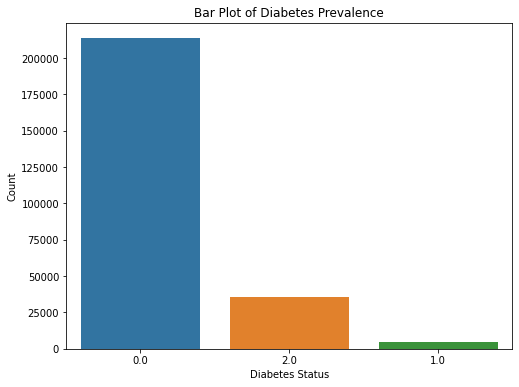

In [0]:
# Convert Spark DataFrame to Pandas DataFrame
data = df1.toPandas()

### Exploratory Data Analysis (EDA)

# Diabete Status in the Dataset
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
sns.countplot(x='Diabetes_012', data=data, palette=colors)
plt.title('Bar Plot of Diabetes Prevalence')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

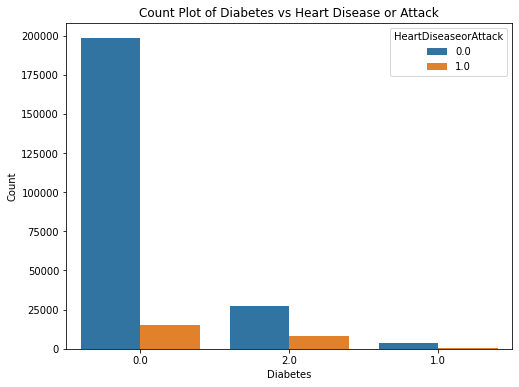

Cross-tabulation table:
HeartDiseaseorAttack     0.0    1.0
Diabetes_012                       
0.0                   198352  15351
1.0                     3967    664
2.0                    27468   7878

Correlation coefficient between Diabetes and Heart Disease or Attack: 0.9201090768528211


In [0]:
# Exploratory Data Analysis of Diabetes and Related Health Conditions
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HeartDiseaseorAttack', data=data, palette=colors)
plt.title('Count Plot of Diabetes vs Heart Disease or Attack')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Create a cross-tabulation table
cross_tab = data.groupby(['Diabetes_012', 'HeartDiseaseorAttack']).size().unstack()

# Print the cross-tabulation table
print("Cross-tabulation table:")
print(cross_tab)

# Calculate the correlation coefficient
correlation = cross_tab.corr().iloc[0, 1]
print("\nCorrelation coefficient between Diabetes and Heart Disease or Attack:", correlation)


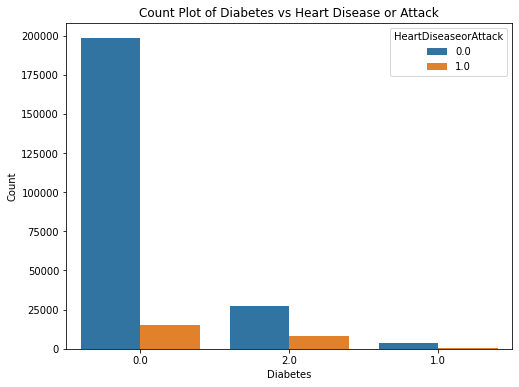

Cross-tabulation table:
HeartDiseaseorAttack     0.0    1.0
Diabetes_012                       
0.0                   198352  15351
1.0                     3967    664
2.0                    27468   7878

Correlation coefficient between Diabetes and Heart Disease or Attack: 0.9201090768528211


<command-2232190266256754>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data['Age'] = pd.to_numeric(comparison_data['Age'], errors='coerce')
<command-2232190266256754>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data['BMI'] = pd.to_numeric(comparison_data['BMI'], errors='coerce')


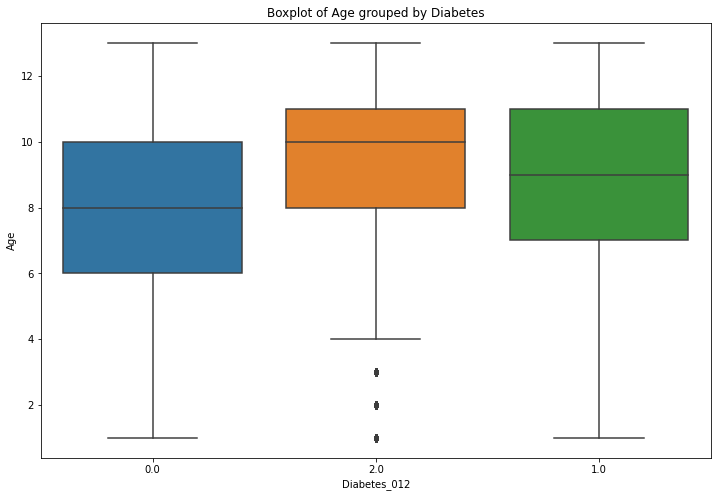

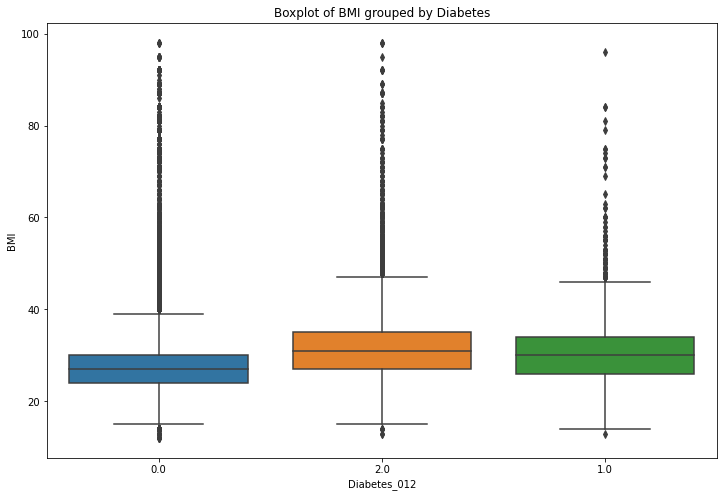

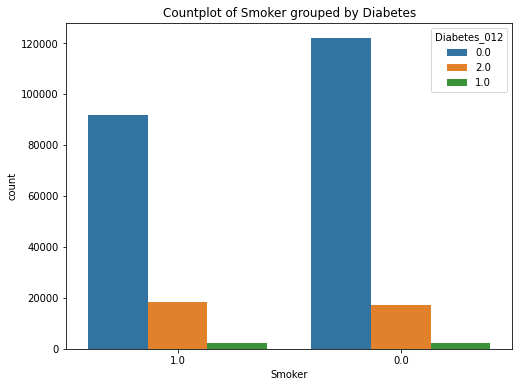

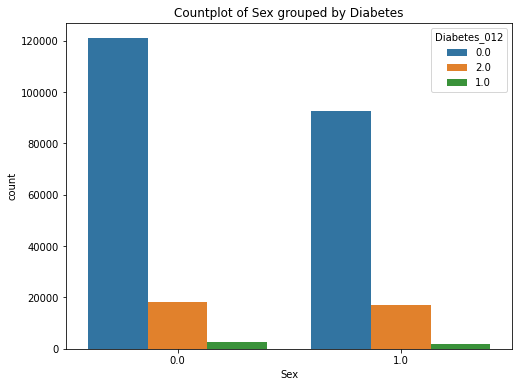

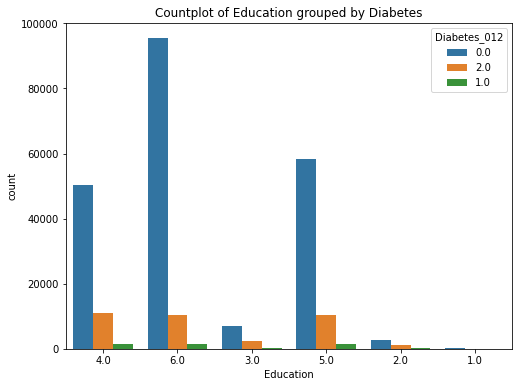

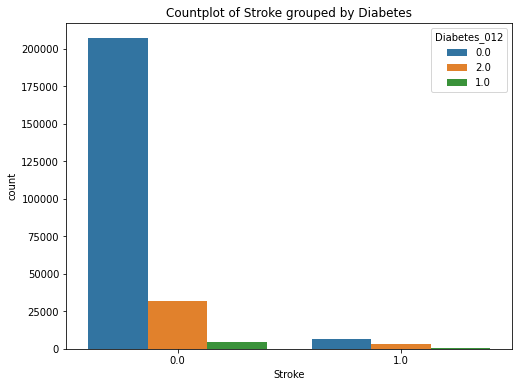

In [0]:
# Define categorical columns
categorical_columns = ["Smoker", "Sex", "Education", "Stroke"]

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HeartDiseaseorAttack', data=data, palette=colors)
plt.title('Count Plot of Diabetes vs Heart Disease or Attack')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Create a cross-tabulation table
cross_tab = pd.crosstab(data['Diabetes_012'], data['HeartDiseaseorAttack'])

# Print the cross-tabulation table
print("Cross-tabulation table:")
print(cross_tab)

# Calculate the correlation coefficient
correlation = cross_tab.corr().iloc[0, 1]
print("\nCorrelation coefficient between Diabetes and Heart Disease or Attack:", correlation)

# Select columns of interest
columns_of_interest = ["Smoker", "Age", "Sex", "Education", "Fruits", "Veggies", "BMI", "Stroke", "Diabetes_012"]
comparison_data = data[columns_of_interest]

# Convert 'Age' and 'BMI' to numeric data type
comparison_data['Age'] = pd.to_numeric(comparison_data['Age'], errors='coerce')
comparison_data['BMI'] = pd.to_numeric(comparison_data['BMI'], errors='coerce')

# Create the boxplot with custom colors
plt.figure(figsize=(12, 8))
sns.boxplot(data=comparison_data, x="Diabetes_012", y="Age", palette=colors)
plt.title('Boxplot of Age grouped by Diabetes')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=comparison_data, x="Diabetes_012", y="BMI", palette=colors)
plt.title('Boxplot of BMI grouped by Diabetes')
plt.show()

# Countplot comparison for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=comparison_data, x=column, hue="Diabetes_012", palette=colors)
    plt.title(f'Countplot of {column} grouped by Diabetes')
    plt.xticks(rotation=0)
    plt.show()


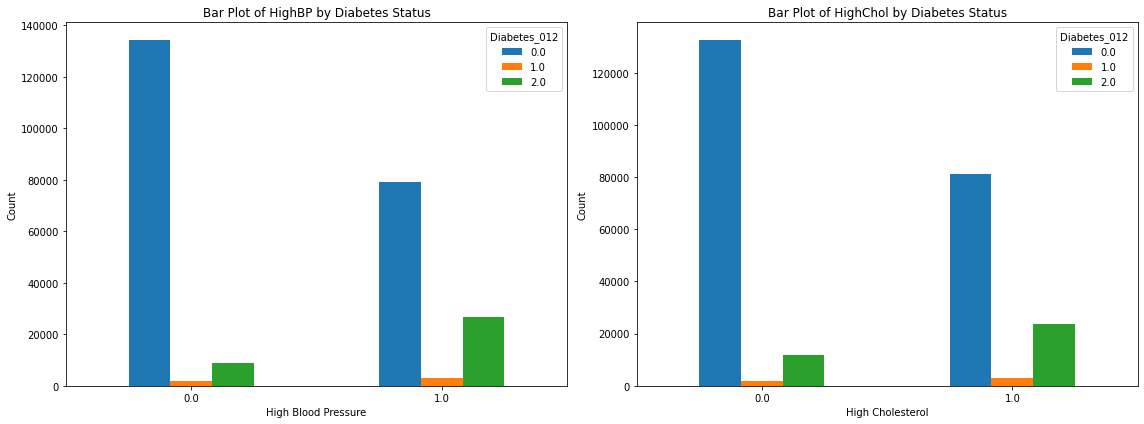

In [0]:
# Bar Plot of High Blood Pressure (HighBP) and High Cholesterol (HighChol) by Diabetes Status
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a Pandas DataFrame
grouped_high_bp = data.groupby(['HighBP', 'Diabetes_012']).size().unstack().fillna(0)
grouped_high_chol = data.groupby(['HighChol', 'Diabetes_012']).size().unstack().fillna(0)

# Plot the pivoted data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for HighBP
axes[0].set_title('Bar Plot of HighBP by Diabetes Status')
grouped_high_bp.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_xlabel('High Blood Pressure')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot for HighChol
axes[1].set_title('Bar Plot of HighChol by Diabetes Status')
grouped_high_chol.plot(kind='bar', color=colors, ax=axes[1])
axes[1].set_xlabel('High Cholesterol')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


<Figure size 576x432 with 0 Axes>

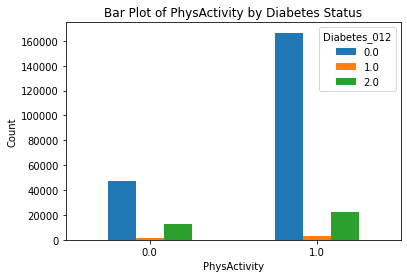

<Figure size 576x432 with 0 Axes>

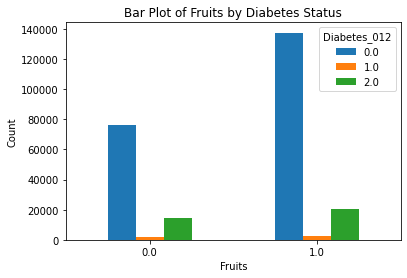

<Figure size 576x432 with 0 Axes>

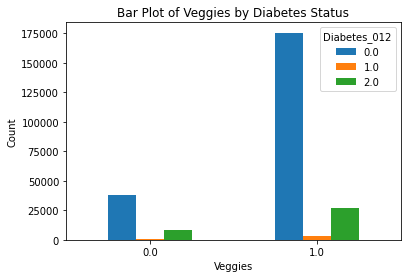

<Figure size 576x432 with 0 Axes>

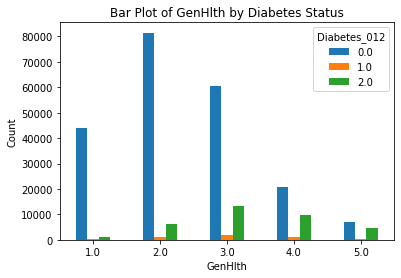

<Figure size 576x432 with 0 Axes>

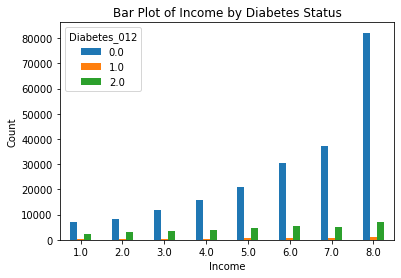

In [0]:
# Bar Plots of PhysActivity, Fruits Consumption, Vegetable Consumption, General Health, and Income Level by Diabetes Status
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a Pandas DataFrame
for column in ['PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'Income']:
    # Group data by the current column and Diabetes status
    grouped_data = data.groupby([column, 'Diabetes_012']).size().unstack().fillna(0)

    # Plot the data
    plt.figure(figsize=(8, 6))
    ax = grouped_data.plot(kind='bar', color=colors)
    plt.title(f'Bar Plot of {column} by Diabetes Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels to 0 degrees
    plt.legend(title='Diabetes_012')

    # Show the plot using Databricks display
    display(plt.show())
